<a href="https://colab.research.google.com/github/TiciaLeal/BigData/blob/main/Laboratorio3_ZonasdePeligro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratorio 3**

**Clasificador de zonas de peligro**

Grupo 30:

• Aniñir Lionel

• Leal Patricia Guillermina

• Weinzettel Eduardo

In [1]:
# Instalación de pandas y scikit-learn
!pip install pandas scikit-learn

# Importamos bibliotecas necesarias
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Carga y Exploración de Datos
En esta etapa inicial, el objetivo es cargar el conjunto de datos que contiene la información sobre crímenes en diferentes estados de EE. UU. y realizar una exploración inicial para entender su estructura y características. Para lograr esto, utilizamos la biblioteca pandas de Python para cargar el conjunto de datos en un DataFrame.

In [2]:
# Cargar el conjunto de datos desde un archivo CSV
file_path = "/content/drive/MyDrive/Colab Notebooks/Big Data/Crimenes.csv"
data = pd.read_csv(file_path)

# Muestra las primeras filas del conjunto de datos para asegurarnos de que se haya cargado correctamente
data.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


En este caso, optamos por cargar los datos directamente desde una URL (usando la ruta o path) utilizando el método read_csv de pandas, que es la forma en que lo venimso trabajando en Colab. Además, utilizamos head() para mostrar las primeras filas del conjunto de datos y obtener una visión inicial de las variables presentes.
Este enfoque es adecuado para comprender la forma y el contenido del conjunto de datos antes de realizar análisis más avanzados.

In [3]:
# Obtener estadísticas descriptivas
data.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Antes de realizar cualquier preprocesamiento o análisis avanzado, es bueno obtener una comprensión inicial del conjunto de datos. La función describe() proporciona estadísticas descriptivas para cada columna, como la media, la desviación estándar, el mínimo, el 25º percentil (Q1), la mediana (Q2 o 50º percentil), el 75º percentil (Q3) y el máximo.
Esta información nos da una visión rápida de la distribución y la variabilidad de las variables en el conjunto de datos. Puede revelar valores atípicos, la magnitud de las diferencias entre los cuartiles y proporcionar una intuición general sobre la naturaleza de los datos.
En este contexto específico, observamos estas estadísticas descriptivas antes de normalizar las variables para comprender mejor la escala y la variabilidad inicial de los datos.

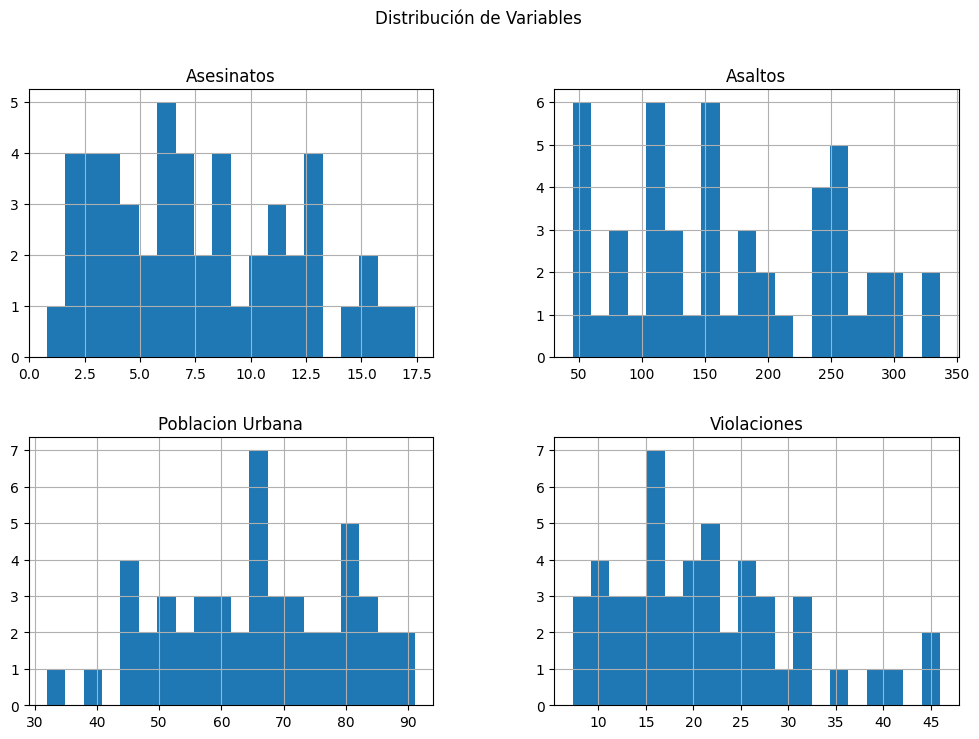

In [4]:
# Visualizar la distribución de las variables con histogramas
data.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de Variables")
plt.show()

La visualización de la distribución de las variables mediante histogramas es una práctica esencial para comprender la forma y la dispersión de los datos. En este caso, utilizamos la función hist() de pandas para generar histogramas para cada columna del conjunto de datos.
Al especificar figsize=(12, 8), controlamos el tamaño de la figura para asegurar una presentación clara. Además, con bins=20, dividimos el rango de valores en 20 intervalos, lo que nos proporciona una buena cantidad de detalle en la visualización.
Esta visualización nos permite identificar patrones en la distribución de las variables y detectar posibles asimetrías o la presencia de valores atípicos. En este caso, la comprensión de la distribución de las variables es útil antes de normalizarlas, ya que nos ayuda a determinar la necesidad de la normalización.

In [5]:
# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64


Antes de continuar con el análisis, es fundamental asegurarse de que no haya valores faltantes en el conjunto de datos. La presencia de valores faltantes podría afectar negativamente la calidad de los resultados del modelo. Para realizar esta verificación, utilizamos la función isnull() de pandas para identificar celdas con valores faltantes y luego sumamos el número de valores faltantes por columna. En este caso no falta ningún valor.

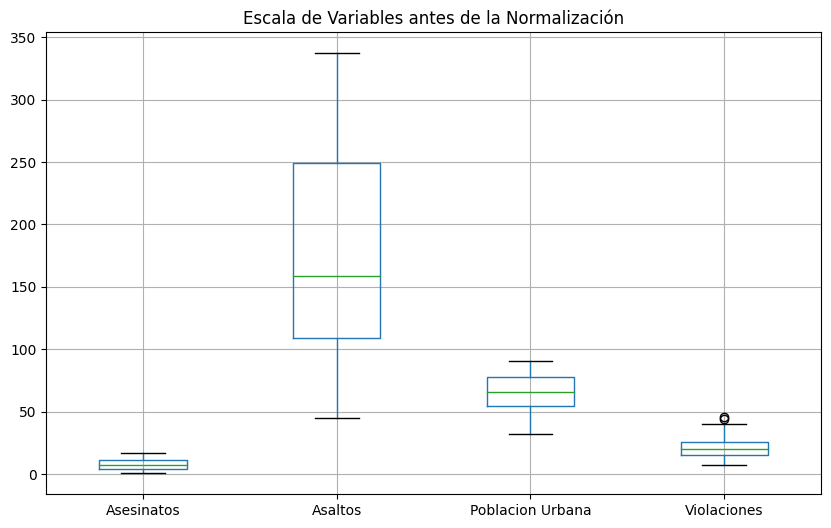

In [6]:
# Visualizar la escala de las variables antes de la normalización
data.drop("Estado", axis=1).boxplot(figsize=(10, 6))
plt.title("Escala de Variables antes de la Normalización")
plt.show()

Antes de normalizar las variables, es útil visualizar la escala original de cada variable para comprender la magnitud de sus valores. La visualización se realiza mediante un gráfico de caja (boxplot) que muestra la distribución de cada variable, resaltando la presencia de posibles valores atípicos y la variabilidad en sus rangos. En este caso, excluimos la columna "Estado" ya que contiene etiquetas categóricas y no proporciona información relevante para este tipo de visualización.
Este gráfico de caja nos ayuda a identificar visualmente si hay diferencias significativas en la escala de las variables antes de aplicar la normalización. En nuestro contexto, podemos observar si hay variables que varían en magnitudes importantes, lo cual justifica la necesidad de normalización. En este caso particular sería adecuado aplicar la normalización.

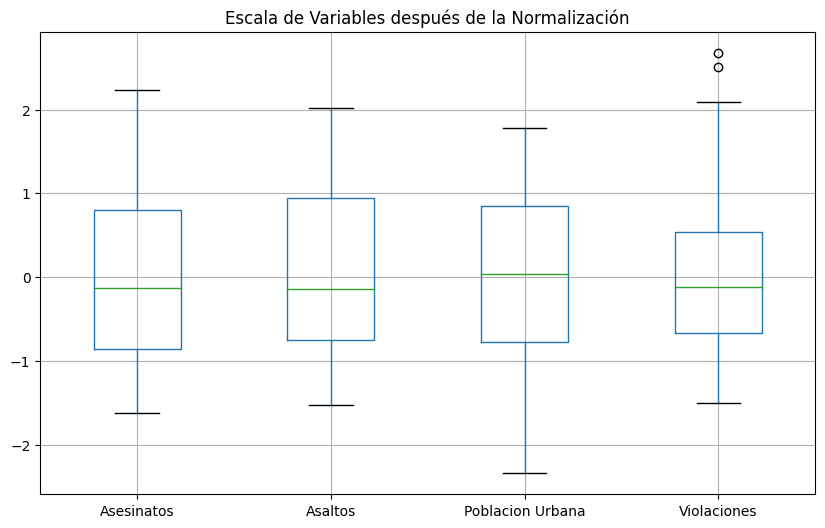

In [7]:
# Normalizar las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.drop("Estado", axis=1))
data_normalized = pd.DataFrame(data_normalized, columns=data.columns[1:])

# Visualizar la escala de las variables después de la normalización
data_normalized.boxplot(figsize=(10, 6))
plt.title("Escala de Variables después de la Normalización")
plt.show()

En esta sección, aplicamos la normalización a las variables utilizando el StandardScaler de scikit-learn. La normalización asegura que todas las variables tengan una escala comparable, lo que es crucial para algoritmos sensibles a la magnitud de las variables, como K-means.
Después de la normalización, creamos un nuevo DataFrame (data_normalized) que contiene las variables normalizadas. Luego, visualizamos la escala de las variables después de la normalización mediante un nuevo gráfico de caja.
Esta visualización es crucial para confirmar que la normalización fue efectiva, asegurando que las variables ahora tengan una escala comparable.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

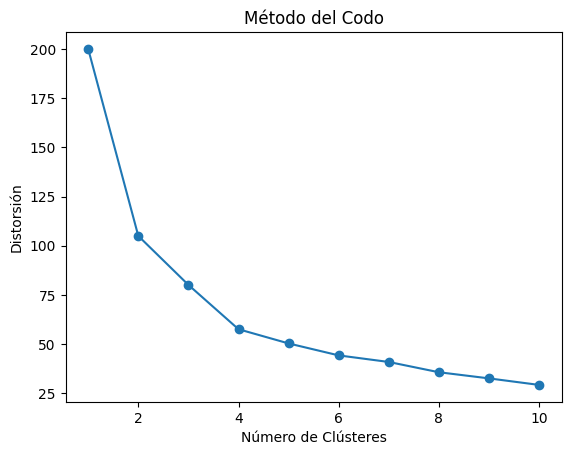

In [8]:
# Determinar el número óptimo de clústeres usando el método del codo
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    distortions.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()

Para determinar el número óptimo de clústeres, utilizamos el método del codo. Este método implica ajustar el modelo K-means para diferentes valores de k y graficar la distorsión (inercia) en función del número de clústeres. La distorsión es la suma de las distancias al cuadrado entre cada punto de datos y el centro de su clúster asignado.
En este caso, variamos el número de clústeres (k) de 1 a 10 y calculamos la distorsión para cada valor de k. La idea es identificar el punto en el gráfico donde la disminución en la distorsión se desacelera, formando un "codo". Este punto indica el número óptimo de clústeres.
La elección del método del codo es relevante porque proporciona una métrica objetiva para determinar el número adecuado de clústeres y evitar la sobre o subestimación. En este gráfico del método del codo se ve claramente que la cantidad de clústeres ideal para utilizar es 2, que es donde se produce el codo, es decir donde termina la caída abrupta y comienza a ser mas suave, por así decirlo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de Clústeres: 2

Centroides Normalizados:
[[  4.87       114.43333333  63.63333333  15.94333333]
 [ 12.165      255.25        68.4         29.165     ]]

Número de Elementos en cada Clúster:
0    30
1    20
Name: Cluster, dtype: int64


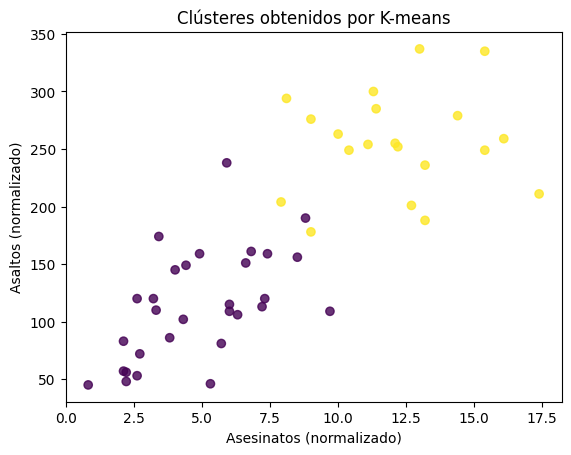

In [10]:
# Aplicar K-means con 2 clústeres
num_clusters = 2
kmeans_final = KMeans(n_clusters=num_clusters, random_state=42)
data_normalized_final = scaler_manual.transform(data_manual)  # Normalizar los datos de entrada
kmeans_final.fit(data_normalized_final)

# Agregar la columna de clústeres al conjunto de datos original
data_final = data_manual.copy()
data_final['Cluster'] = kmeans_final.labels_

# Mostrar los resultados
print("Número de Clústeres:", num_clusters)
print("\nCentroides Normalizados:")
print(scaler_manual.inverse_transform(kmeans_final.cluster_centers_))
print("\nNúmero de Elementos en cada Clúster:")
print(data_final['Cluster'].value_counts())

# Visualizar los clústeres en el espacio de las variables
plt.scatter(data_final['Asesinatos'], data_final['Asaltos'], c=data_final['Cluster'], cmap='viridis', alpha=0.8)
plt.title('Clústeres obtenidos por K-means')
plt.xlabel('Asesinatos (normalizado)')
plt.ylabel('Asaltos (normalizado)')
plt.show()

En esta sección, aplicamos el algoritmo K-means con el número óptimo de clústeres determinado anteriormente (2 clústeres). Después de ajustar el modelo, normalizamos los datos de entrada y agregamos la columna de clústeres al conjunto de datos original.
En este código, se destaca la importancia de normalizar los datos de entrada antes de aplicar K-means para garantizar que todas las variables tengan una escala consistente. Además, mostramos los resultados, incluidos los centroides normalizados de los clústeres, el número de elementos en cada clúster y una visualización de los clústeres en el espacio de las variables.

Cluster                          0           1
Asesinatos       count   30.000000   20.000000
                 mean     4.870000   12.165000
                 std      2.304291    2.684904
                 min      0.800000    7.900000
                 25%      2.825000   10.300000
                 50%      4.650000   12.150000
                 75%      6.525000   13.500000
                 max      9.700000   17.400000
Asaltos          count   30.000000   20.000000
                 mean   114.433333  255.250000
                 std     47.481890   44.116920
                 min     45.000000  178.000000
                 25%     81.500000  229.750000
                 50%    111.500000  254.500000
                 75%    150.500000  280.500000
                 max    238.000000  337.000000
Poblacion_Urbana count   30.000000   20.000000
                 mean    63.633333   68.400000
                 std     14.406616   14.463748
                 min     32.000000   44.000000
             

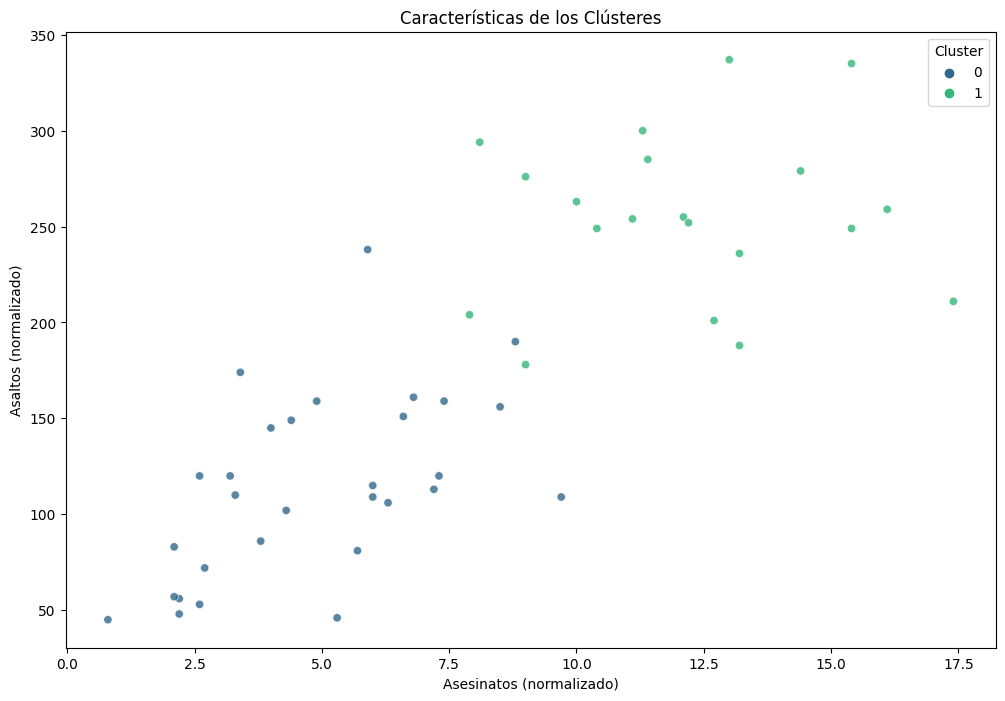

In [11]:
# Mostrar estadísticas descriptivas por clúster
cluster_stats = data_final.groupby('Cluster').describe().transpose()
print(cluster_stats)

# Visualizar las características de los clústeres
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Asesinatos', y='Asaltos', hue='Cluster', data=data_final, palette='viridis', alpha=0.8)
plt.title('Características de los Clústeres')
plt.xlabel('Asesinatos (normalizado)')
plt.ylabel('Asaltos (normalizado)')
plt.show()

En esta etapa, realizamos un análisis estadístico detallado de los clústeres creados utilizando la función groupby para agrupar el conjunto de datos por la columna de clúster y calcular estadísticas descriptivas para cada uno. Además, visualizamos las características de los clústeres mediante un gráfico de dispersión que representa las variables normalizadas "Asesinatos" y "Asaltos".
El análisis estadístico por clúster nos proporciona una comprensión más profunda de las características específicas de cada grupo. Las estadísticas descriptivas incluyen la media, la desviación estándar y los percentiles para cada variable en cada clúster. La visualización mediante un gráfico de dispersión facilita la identificación de patrones y diferencias entre los clústeres.
La elección de estas técnicas es relevante porque nos permite interpretar y comunicar de manera efectiva las diferencias entre los grupos identificados por el algoritmo de clustering.

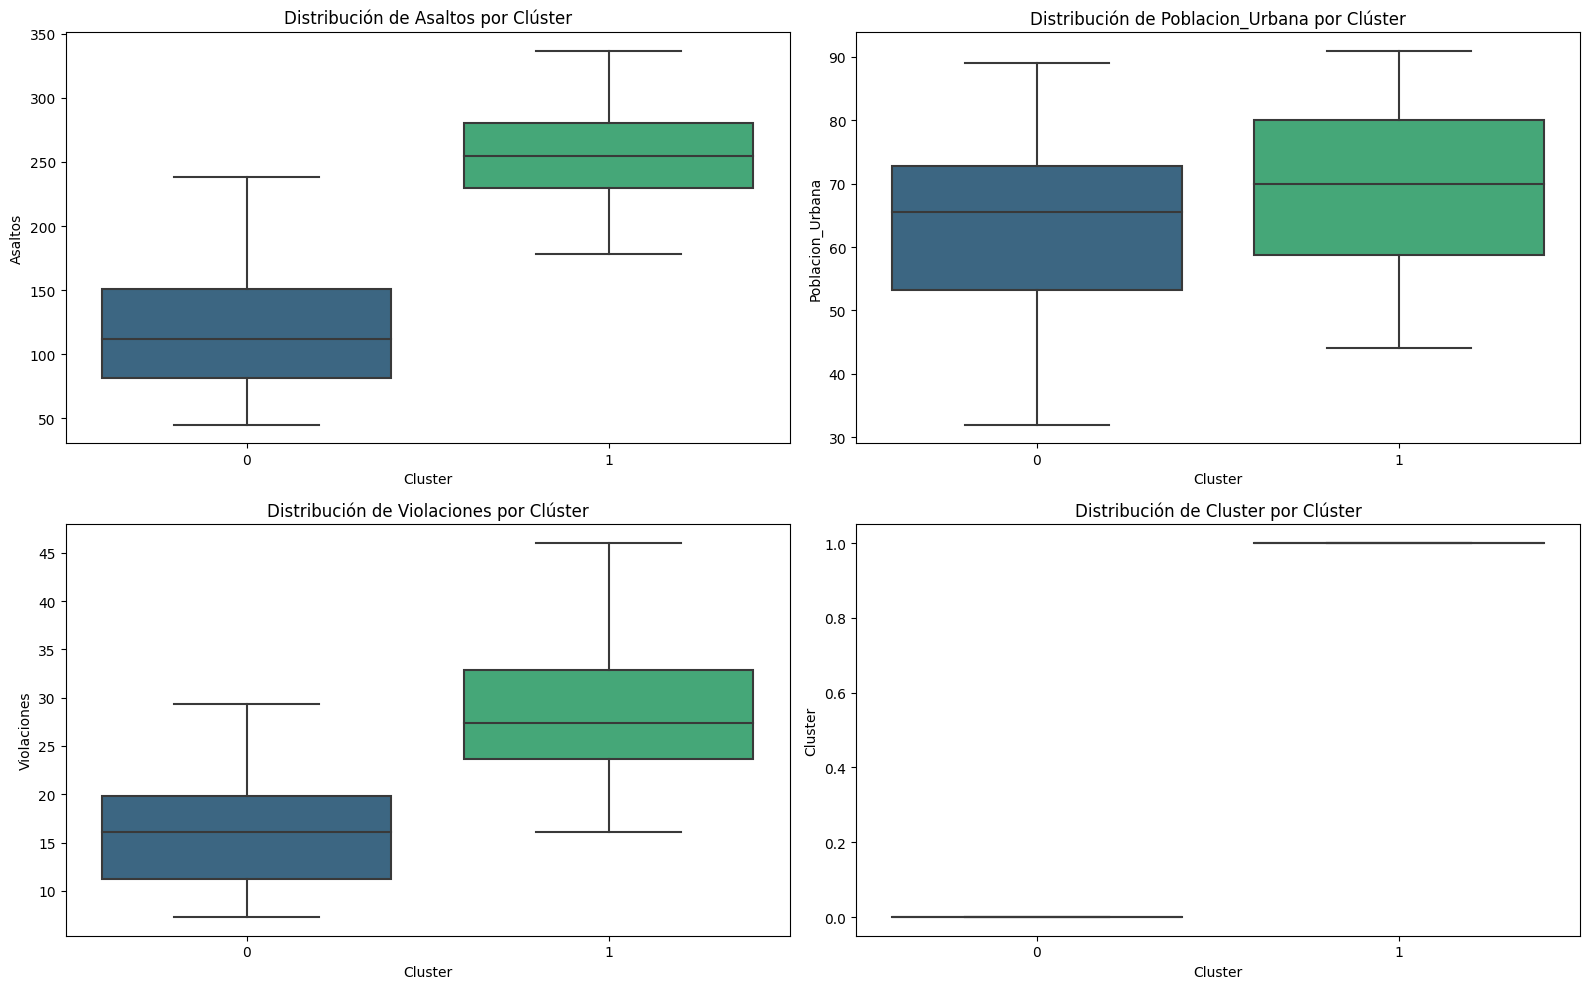

In [12]:
# Visualizar la distribución de variables por clúster
plt.figure(figsize=(16, 10))

# Loop a través de las columnas y crear subgráficos
for i, column in enumerate(data_final.columns[1:5]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=column, data=data_final, palette='viridis')
    plt.title(f'Distribución de {column} por Clúster')

plt.tight_layout()
plt.show()

En esta sección, visualizamos la distribución de las variables por clúster utilizando diagramas de caja (boxplots). Cada diagrama de caja representa la distribución de una variable específica en cada uno de los clústeres.
En este código, creamos subgráficos para cada variable (excepto la columna 'Estado') y utilizamos diagramas de caja para representar la distribución de cada variable en los clústeres. Esta visualización proporciona información sobre cómo las variables difieren entre los clústeres y ayuda a identificar posibles patrones o tendencias.
La elección de los boxplots es relevante porque son efectivos para comparar la distribución de varias variables entre diferentes grupos.

**Documentación de desafíos e inconvenientes en el desarrollo**

Durante el desarrollo de este proyecto de clustering, se enfrentaron algunos desafíos e inconvenientes que se abordaron de manera efectiva para lograr una implementación exitosa del programa. A continuación, se detallan estos desafíos junto con las soluciones adoptadas:

Selección del número de clústeres e interpretación del Método del Codo:
Desafío: La elección del número de clústeres puede ser subjetiva y depende de la interpretación del analista.
Solución: Se aplicó el método del codo y se explicó el razonamiento detrás de la elección del número óptimo de clústeres.
Se buscó un equilibrio entre la complejidad del modelo y la calidad de la agrupación.
Desafío: La interpretación del gráfico generado por el método del codo puede ser subjetiva, y determinar el punto exacto del "codo" puede ser difícil.
Solución: Se optó por un enfoque visual y se buscó el punto donde la disminución en la distorsión se desaceleraba significativamente. Además, se proporcionó una descripción  del análisis visual para respaldar la elección del número óptimo de clústeres.

Normalización de variables:
Desafío: La elección de normalizar variables es crucial, pero la escala de las variables antes de la normalización puede variar significativamente.
Solución: Se visualizó la escala de las variables antes y después de la normalización para confirmar la efectividad del proceso. Además, se explicó la importancia de la normalización para asegurar que todas las variables tengan una escala comparable.

Interpretación de resultados:
Desafío: La interpretación de los resultados de clustering puede ser compleja y requiere un análisis detallado de estadísticas y visualizaciones.
Solución: Se proporcionó un análisis estadístico detallado por clúster, incluyendo medias, desviaciones estándar y visualizaciones. Se explicó la relevancia de estas estadísticas para comprender las características específicas de cada grupo.
En general, estos desafíos se abordaron mediante un enfoque cuidadoso, análisis visual y explicaciones en cada paso del código. La transparencia en el proceso de toma de decisiones y la comunicación clara de los resultados contribuyeron a la resolución exitosa de los desafíos encontrados durante el desarrollo.